In [1]:
import spotipy
import spotipy.util as util
import pandas as pd

In [2]:
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth

In [3]:
client_id = 'ca5d9b9710bd471baff916850b4e8490'
client_secret = '39e696f46e8848b292b18c242af9409f'

In [4]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="ca5d9b9710bd471baff916850b4e8490",
                                                           client_secret="39e696f46e8848b292b18c242af9409f"))

In [5]:
sp.user_playlist_tracks("spotify", "37i9dQZF1DX5IDTimEWoTd")

{'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DX5IDTimEWoTd/tracks?offset=0&limit=100&additional_types=track',
 'items': [{'added_at': '2021-05-21T04:00:00Z',
   'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/'},
    'href': 'https://api.spotify.com/v1/users/',
    'id': '',
    'type': 'user',
    'uri': 'spotify:user:'},
   'is_local': False,
   'primary_color': None,
   'track': {'album': {'album_type': 'single',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1Hsdzj7Dlq2I7tHP7501T4'},
       'href': 'https://api.spotify.com/v1/artists/1Hsdzj7Dlq2I7tHP7501T4',
       'id': '1Hsdzj7Dlq2I7tHP7501T4',
       'name': 'Niall Horan',
       'type': 'artist',
       'uri': 'spotify:artist:1Hsdzj7Dlq2I7tHP7501T4'}],
     'available_markets': ['AD',
      'AE',
      'AG',
      'AL',
      'AM',
      'AO',
      'AR',
      'AT',
      'AU',
      'AZ',
      'BA',
      'BB',
      'BD',
      'BE',
      'BF',
      'BG'

In [44]:
def analyze_playlist(creator, playlist_id):
    
    # Create empty dataframe
    playlist_features_list = ["artist","album","track_name",  "track_id","danceability","energy","key","loudness","mode", "speechiness","instrumentalness","liveness","valence","tempo", "duration_ms","time_signature"]
    
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    
    # Loop through every track in the playlist, extract features and append the features to the playlist df
    results = sp.user_playlist_tracks(creator, playlist_id)#["items"]#self.sp.user_playlist_tracks(uri.split(':')[2], uri.split(':')[4])
    playlist = results['items']

    # Loops to ensure I get every track of the playlist
    while results['next']:
        results = sp.next(results)
        playlist.extend(results['items'])
    #playlist = []
    #for i in range(0, 2000, 100):
        #playlist.extend(sp.user_playlist_tracks(creator, playlist_id, offset = i)["items"])
    #print(playlist)

    for track in playlist:
        # Create empty dict
        playlist_features = {}
        # Get metadata
        #print(track['track']['album']['artists'])
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]

        # Get audio features
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[4:]:
            playlist_features[feature] = audio_features[feature]

        # Concat the dfs
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)
        
    return playlist_df.to_csv("spotify_pl_all_that.csv", sep = ',')

In [28]:
analyze_playlist("spotify", "37i9dQZF1DX5IDTimEWoTd")

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Niall Horan,Put A Little Love On Me,Put A Little Love On Me,1hCTxutVVYvggAQcUUUZAT,0.584,0.465,10,-4.880,1,0.0262,0,0.106,0.299,95.969,224586,4
1,Ben Platt,Sing To Me Instead,Grow As We Go,6hYvw3LLTViP2mT4MpDNmT,0.458,0.137,8,-14.083,1,0.0355,0,0.150,0.437,80.824,249427,4
2,Jeremy Zucker,this is how you fall in love,this is how you fall in love,0742PcMPo2Akmo4vHC29VZ,0.520,0.204,7,-12.488,1,0.0355,0.000025,0.126,0.274,79.682,174587,4
3,Justin Bieber,Justice,Off My Face,3T03rPwlL8NVk1yIaxeD8U,0.509,0.228,4,-8.680,1,0.0332,0,0.104,0.586,90.674,156468,4
4,James Arthur,Falling Like The Stars,Falling Like The Stars,15xWRPHQMeqgdkGzInx3PY,0.296,0.351,6,-9.538,1,0.0352,0.000001,0.110,0.190,177.060,212720,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,John Legend,Love In The Future (South Africa Tour Edition),All of Me,3uhBIQ7tv8j1FME8cFGEfG,0.422,0.264,8,-7.064,1,0.0322,0,0.132,0.331,119.930,269560,4
76,Adele,21,Turning Tables,5O6yk6U8L3rTbFsIwuqe8H,0.305,0.452,0,-6.077,0,0.0293,0.000017,0.129,0.210,79.830,250133,4
77,Alicia Keys,The Diary Of Alicia Keys,If I Ain't Got You,3XVBdLihbNbxUwZosxcGuJ,0.609,0.444,7,-9.129,1,0.1060,0.000007,0.104,0.166,118.402,228707,3
78,Coldplay,X&Y,Fix You,7LVHVU3tWfcxj5aiPFEW4Q,0.209,0.417,3,-8.740,1,0.0338,0.00196,0.113,0.124,138.178,295533,4


In [45]:
analyze_playlist("spotify", "4Gz7FAUEX9RWdpdje7qLiR")

#playlist_df.to_csv("spotify_pl_all_that.csv", sep = ',')

def analyze_playlist_dict(playlist_dict):
    
    # Loop through every playlist in the dict and analyze it
    for i, (key, val) in enumerate(playlist_dict.items()):
        playlist_df = analyze_playlist(*val)
        # Add a playlist column so that we can see which playlist a track belongs too
        playlist_df["playlist"] = key
        # Create or concat df
        if i == 0:
            playlist_dict_df = playlist_df
        else:
            playlist_dict_df = pd.concat([playlist_dict_df, playlist_df], ignore_index = True)
            
    return playlist_dict_df

playlist_dict = {
 'Greatest Playlist Ever' : ('spotify', '4Gz7FAUEX9RWdpdje7qLiR'), 
 #'Longest playlist ever' : ('spotify', '3crEbeyihVkc467poiIV03')
}

multiple_playlist_df = analyze_playlist_dict(playlist_dict)
multiple_playlist_df["playlist"].value_counts()

multiple_playlist_df.head()

In [48]:
spotify_df = pd.read_csv("spotify_pl_all_that.csv")

In [49]:
spotify_df.head()

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,a-ha,Hunting High and Low,Take on Me,2WfaOiMkCvy7F5fcp2zZ8L,0.573,0.902,6,-7.638,0,0.0540,0.001250,0.0928,0.876,84.412,225280,4
1,The Proclaimers,Sunshine on Leith,I'm Gonna Be (500 Miles),67iAlVNDDdddxqSD2EZhFs,0.851,0.551,4,-5.177,1,0.0396,0.000000,0.0827,0.807,131.922,219467,4
2,Simple Minds,Once Upon A Time (Deluxe),Don't You (Forget About Me),4aWn4NHlELpOehxsBaQeoe,0.660,0.816,2,-6.610,1,0.0299,0.018100,0.0608,0.678,111.346,263040,4
3,Billy Joel,Piano Man,Piano Man,78WVLOP9pN0G3gRLFy1rAa,0.334,0.477,0,-8.806,1,0.0276,0.000004,0.3120,0.405,179.239,336200,3
4,ABBA,Arrival,Dancing Queen,0GjEhVFGZW8afUYGChu3Rr,0.543,0.870,9,-6.514,1,0.0428,0.000939,0.7920,0.754,100.804,230400,4


In [50]:
mylist = list(spotify_df.select_dtypes(include=['object']).columns)
mylist

['artist', 'album', 'track_name', 'track_id']

In [51]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

X_prep = spotify_df.drop(['artist', 'album', 'track_name', 'track_id'], axis = 1)
# Transform the data into 2D so we can see
pca = PCA(2) 
X_2D = pca.fit_transform(X_prep)
X_2D

array([[-1.27956540e+04, -4.24707505e+01],
       [-1.86086552e+04,  4.91266764e+00],
       [ 2.49643453e+04, -1.45972660e+01],
       ...,
       [-6.40626561e+04,  3.70819280e+01],
       [ 3.24313457e+04, -3.07889157e+01],
       [-9.67565474e+03, -1.47854733e+01]])

In [52]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(X_2D)

KMeans(n_clusters=7, random_state=42)

In [53]:
clusters = kmeans.predict(X_2D)
clusters

array([5, 5, 0, ..., 2, 0, 5])

In [54]:
X_prep.index

RangeIndex(start=0, stop=2105, step=1)

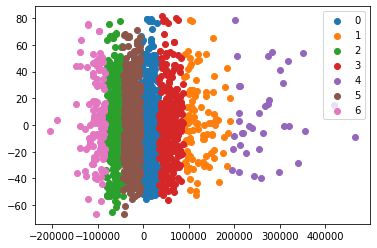

In [55]:
labels = np.unique(clusters)

for i in labels:
    plt.scatter(X_2D[clusters == i , 0] , X_2D[clusters == i , 1] , label = i)
plt.legend()
plt.show()

In [57]:
df = pd.DataFrame(X_2D)
df['cluster'] = clusters
df

,0,1,cluster
0,-12795.654048,-42.470751,5
1,-18608.655239,4.912668,5
2,24964.345268,-14.597266,0
3,98124.343555,55.082517,1
4,-7675.654465,-25.923339,5
...,...,...,...
2100,-20342.655073,-1.732382,5
2101,17031.345763,-34.963865,0
2102,-64062.656061,37.081928,2
2103,32431.345672,-30.788916,0


In [58]:
from sklearn.metrics import pairwise_distances_argmin_min

X = df.drop('cluster', axis=1)
closest, _ = pairwise_distances_argmin_min(X.loc[[1]], X)
# here, this X.loc[[0]] would be representing "a new song"
closest

array([1], dtype=int64)

In [67]:
def find_out(song, artist, df):
    place = df[(df['track_name']== song)&(df['artist'] == artist)].index
    print(place)
    df1 = df.drop(['artist', 'album', 'track_name', 'track_id'], axis = 1)
    if len(place) != 0:#song in df['name'].values:
        df1 = df1.drop(place)
    df2 = df.drop(['artist', 'album', 'track_name', 'track_id'], axis = 1)
    closest, _ = pairwise_distances_argmin_min(df2.iloc[place], df1)
    return df.iloc[closest[0]][['track_name', 'artist']]
    

def find_out2(song, artist, df):
    place = df[(df['name']== song)&(df['artists_upd'] == f"['{artist}']")].index
    print(place)
    df1 = df.drop(['id', 'name',  'artists', 'id_artists', 'release_date', 'artists_upd_v1', 'artists_upd_v2', 'artists_upd', 'artists_song', 'consolidates_genre_lists',
 'year'], axis = 1)
    if len(place) != 0:#song in df['name'].values:
        df1 = df1.drop(place)
    df2 = df.drop(['id', 'name',  'artists', 'id_artists', 'release_date', 'artists_upd_v1', 'artists_upd_v2', 'artists_upd', 'artists_song', 'consolidates_genre_lists',
 'year'], axis = 1)
    closest, _ = pairwise_distances_argmin_min(df2.iloc[place], df1, metric = 'cosine')
    return df.iloc[closest[0]][['name', 'artists']]

In [68]:
def find_out2(song, artist, df):
    place = df[(df['track_name']== song)&(df['artist'] == artist)].index
    print(place)
    df1 = df.drop(['artist', 'album', 'track_name', 'track_id'], axis = 1)
    if len(place) != 0:#song in df['name'].values:
        df1 = df1.drop(place)
    df2 = df.drop(['artist', 'album', 'track_name', 'track_id'], axis = 1)
    closest, _ = pairwise_distances_argmin_min(df2.iloc[place], df1, metric = 'cosine')
    return df.iloc[closest[0]][['track_name', 'artist']]
    

In [62]:
find_out('Take on Me','a-ha',spotify_df)

Int64Index([0], dtype='int64')


track_name      L.S.F.
artist        Kasabian
Name: 283, dtype: object

In [70]:
find_out2('Take on Me','a-ha',spotify_df)

Int64Index([0], dtype='int64')


track_name    Porcelain
artist             Moby
Name: 343, dtype: object

In [63]:
find_out('Brianstorm','Arctic Monkeys',spotify_df)


Int64Index([20], dtype='int64')


track_name    Ain't No Grave
artist           Johnny Cash
Name: 266, dtype: object

In [71]:
find_out2('Brianstorm','Arctic Monkeys',spotify_df)

Int64Index([20], dtype='int64')


track_name    Back To Black
artist        Amy Winehouse
Name: 2091, dtype: object

In [64]:
find_out('Pompeii','Bastille',spotify_df)


Int64Index([30, 1694], dtype='int64')


track_name    Don't You Find
artist               Jamie T
Name: 251, dtype: object

In [72]:
find_out2('Pompeii','Bastille',spotify_df)

Int64Index([30, 1694], dtype='int64')


track_name       Jimmy Jimmy
artist        The Undertones
Name: 1814, dtype: object

In [65]:
find_out('Pure Morning','Placebo',spotify_df)

Int64Index([972], dtype='int64')


track_name           Glory Days
artist        Bruce Springsteen
Name: 91, dtype: object

In [69]:
find_out2('Pure Morning','Placebo',spotify_df)

Int64Index([972], dtype='int64')


track_name    Bohemian Rhapsody - Remastered 2011
artist                                      Queen
Name: 1406, dtype: object

In [73]:
find_out('November Rain',"Guns N' Roses",spotify_df)

Int64Index([1168], dtype='int64')


track_name    Say Hello, Wave Goodbye
artist                     David Gray
Name: 133, dtype: object

In [74]:
find_out2('November Rain',"Guns N' Roses",spotify_df)

Int64Index([1168], dtype='int64')


track_name    Listen Up - Remastered
artist                         Oasis
Name: 1531, dtype: object